<a href="https://colab.research.google.com/github/Sir20PiR/Product-Recommendation-For-IA-Project/blob/main/Sistema_de_Recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
#Bibliotecas Básicas
import pandas as pd
import numpy as np

In [ ]:
#Bibliotecas para a visualização de dados
import matplotlib.pyplot as plt #Biblioteca para visualização de dados
import seaborn as sns #Biblioteca Estatistica para Visualização de Dados
sns.set(style='whitegrid') #Cor do fundo do gráfico

# Importando Dataset

In [ ]:
#Importando Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importanto o Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ratings_Video_Games.csv', header=None, names = ['user_id','prod_id','rating', 'timestamp'])

In [ ]:
#Mostrando o Dataset
df.head()

,user_id,prod_id,rating,timestamp
0,AB9S9279OZ3QO,0078764343,5.0,1373155200
1,A24SSUT5CSW8BH,0078764343,5.0,1377302400
2,AK3V0HEBJMQ7J,0078764343,4.0,1372896000
3,A10BECPH7W8HM7,043933702X,5.0,1404950400
4,A2PRV9OULX1TWP,043933702X,5.0,1386115200


In [ ]:
#Retirar a coluna timestamp pois não será utilizada 
df.drop('timestamp',axis=1, inplace=True)

In [ ]:
#Definindo os nomes das colunas
df.columns = ['userID', 'item', 'rating']

In [ ]:
df.head()

,userID,item,rating
0,AB9S9279OZ3QO,0078764343,5.0
1,A24SSUT5CSW8BH,0078764343,5.0
2,AK3V0HEBJMQ7J,0078764343,4.0
3,A10BECPH7W8HM7,043933702X,5.0
4,A2PRV9OULX1TWP,043933702X,5.0


In [ ]:
df.describe()

,rating
count,1.324753e+06
mean,3.978754e+00
std,1.378987e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [ ]:
#Checar falhas na obtenção de respostas 
df.isnull().sum()

userID    0
item      0
rating    0
dtype: int64

In [ ]:
#Mostrando quantidade de linhas e colunas do Dataset
df.shape

(1324753, 3)

# Análise dos dados do Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


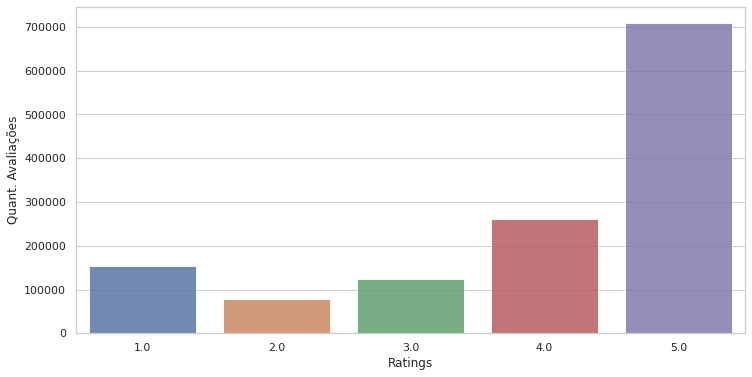

In [ ]:
#Plotagem do Histograma 
plt.figure(figsize=(12,6))
sns.countplot('rating', data=df, alpha=0.85)
plt.xlabel('Ratings', size=12)
plt.ylabel('Quant. Avaliações', size=12)
plt.show()

In [ ]:
print(f'Número total de avaliações: {len(df)} \nNúmero total de usuários: {len(df.userID.unique())} \
\nNúmero médio de avaliações por usuário: {round(len(df)/len(df.userID.unique()),2)}')

Número total de avaliações: 1324753 
Número total de usuários: 826767 
Número médio de avaliações por usuário: 1.6


In [ ]:
#Vamos ver os usuários que classificaram mais
more = df.groupby('userID').rating.count().sort_values(ascending=False)
more.head()

userID
A3V6Z4RCDGRC44    880
A3W4D8XOGLWUN5    817
AJKWF4W7QD4NS     797
A2QHS1ZCIQOL7E    521
A2TCG2HV1VJP6V    474
Name: rating, dtype: int64

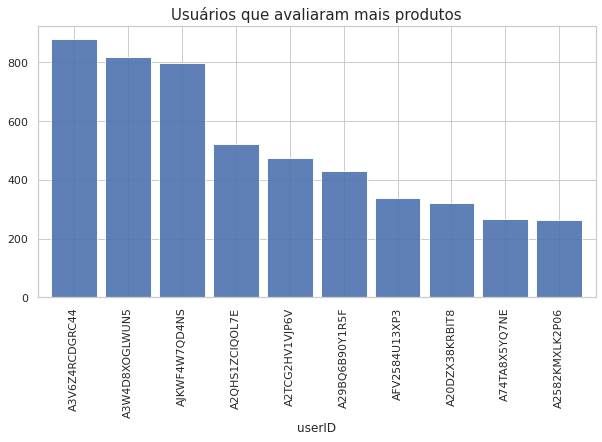

In [ ]:
plt.figure(figsize=(10,5))
more.head(10).plot(kind='bar', alpha=0.9, width=0.85)
plt.title("Usuários que avaliaram mais produtos", size=15)
plt.show()

In [ ]:
#Criando um conjunto de quantis de 0 a 100% com passo de 1%
quantiles = more.quantile(np.arange(0,1.01,0.01), interpolation='higher')

#Quantis em Escala de log
quantiles_log = np.log(quantiles)

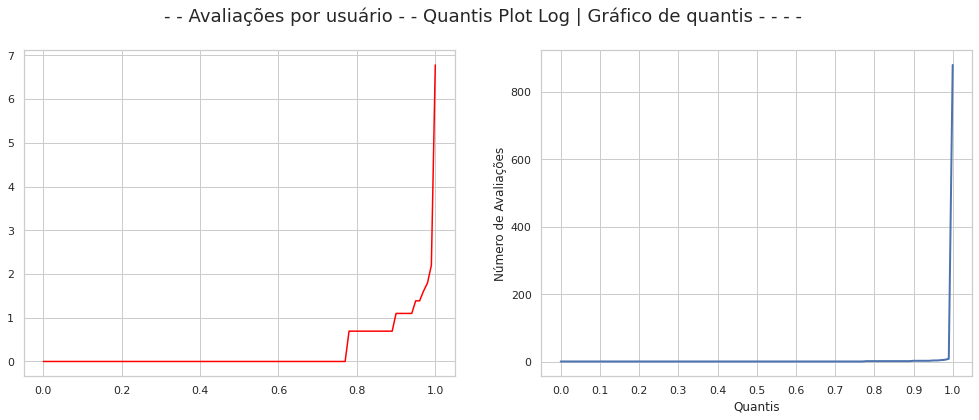

In [ ]:
# Plotando os quantis
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,6))
ax1.plot(quantiles_log, c='red')
ax2.plot(quantiles, linewidth=2)
fig.suptitle('- - Avaliações por usuário - - Quantis Plot Log | Gráfico de quantis - - - -', size=18)
plt.xlabel('Quantis')
plt.ylabel('Número de Avaliações')
plt.xticks(np.arange(0.,1.01, 0.1))
plt.show()

In [ ]:
#Quantidade de usuários que avaliaram mais de 50 produtos
print(f'Avaliou 50 ou mais produtos: {sum(more>=50)}')
print(f'Avaliou mais que 50 produtos: {sum(more>50)}')

Avaliou 50 ou mais produtos: 351
Avaliou mais que 50 produtos: 341


In [ ]:
#Criando um novo DataFrame com avaliação média e número de avaliações por produto
ratings = pd.DataFrame(df.groupby('item').rating.mean())

#Adicionando coluna com número de avaliações por produto
ratings['rating_counts'] = df.groupby('item').rating.count()

In [ ]:
#Visualizando os 5 produtos mais bem avaliados (número de avaliações)
ratings.sort_values(by='rating_counts', ascending=False).head(5)

,rating,rating_counts
item,,
B00DJFIMW6,4.464645,16221
B00BGA9WK2,4.075519,7561
B00FAX6XQC,4.190268,5713
B009KS4XRO,4.046092,5489
B002VBWIP6,4.636802,5190


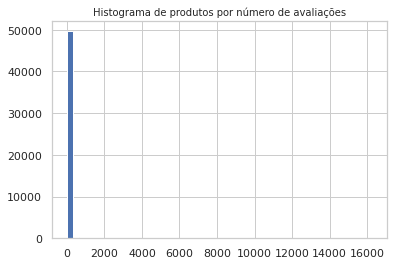

In [ ]:
ratings.rating_counts.hist(bins=50)
plt.title('Histograma de produtos por número de avaliações', size=10)
plt.show()

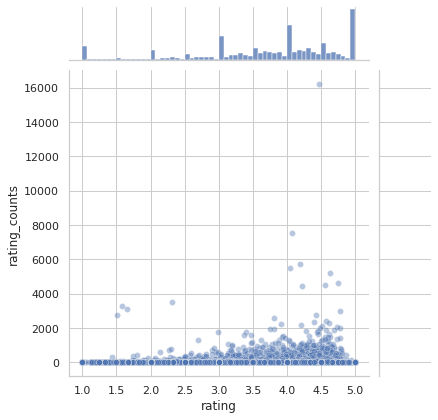

In [ ]:
#Gráfico de dispersão das avaliações pela quantidade
sns.jointplot(x='rating', y='rating_counts', data=ratings, alpha=0.4)
plt.show()

# Popular Based Recommender 

In [ ]:
#Dataframe com produtos que possuem mais de 50 avaliações
new_df = df.groupby("item").filter(lambda x:x['rating'].count() >= 50)

#Criando um novo DataFrame com avaliação média e número de avaliações por produto
ratings_df = pd.DataFrame(new_df.groupby('item').rating.mean())

#Adicionando coluna com número de avaliações por produto
ratings_df['rating_counts'] = new_df.groupby('item').rating.count()

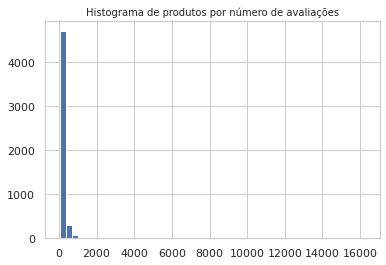

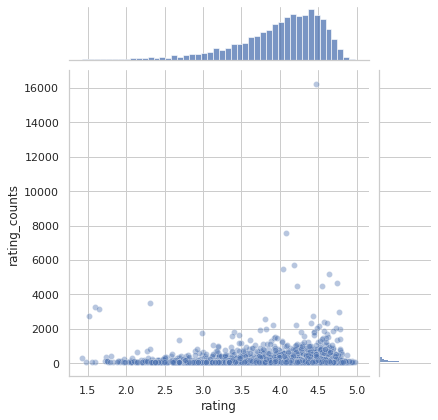

In [ ]:
#Plotando Histograma
ratings_df.rating_counts.hist(bins=50)
plt.title('Histograma de produtos por número de avaliações', size=10)
plt.show()

print('\n')

#Gráfico de dispersão das avaliações pela quantidade
sns.jointplot(x='rating', y='rating_counts', data=ratings_df, alpha=0.4)
plt.show()

In [ ]:
#A média global das avaliações
C = ratings_df['rating'].mean()
print(round(C,2))

4.0


In [ ]:
#Número mínimo de votos necessários para estar no recomendador de popularidade
m = ratings_df.rating_counts.min(); m

50

In [ ]:
#Função que calcula a avaliação ponderada de cada item
def weighted_rating(x, m=m, C=C):
    v = x['rating_counts']
    R = x['rating']
    #Cálculo baseado na fórmula do IMDB
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
#Adicione o 'score' calculado com weighted_rating() ao dataframe
ratings_df['score'] = ratings_df.apply(weighted_rating, axis=1)

In [ ]:
#Resultado final com os 15 produtos mais populares
ratings_df.sort_values(by='score', ascending=False).head(15)

,rating,rating_counts,score
item,,,
B007W8S2MG,4.870044,454,4.783889
B000B9RI14,4.775701,2996,4.762994
B004RMK4BC,4.780586,1978,4.761381
B006OOHYIC,4.780367,1416,4.753806
B001JKTC9A,4.782918,843,4.739171
B0055SWM08,4.744718,4638,4.736792
B0053BCML6,4.785430,755,4.736745
B003O6E800,4.790490,673,4.735934
B00AKIPBNS,4.803403,529,4.734162


# Utilizando o método KNN baseado em uzuário

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 7.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633718 sha256=f3c60b4f188859701e37c89f8171a78a5ab5dc0537762752a4d22538502bc6a5
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise.prediction_algorithms.slope_one import SlopeOne
from surprise.prediction_algorithms.co_clustering import CoClustering

from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [ ]:
#Para reduzir a dimensão do conjunto de dados, filtraremos os dados
#Mínimo de avaliações por produto = 50
min_ratings = 50
filter_items = df['item'].value_counts() > min_ratings
filter_items = filter_items[filter_items].index.tolist()

#Mínimo de avaliações por usuário = 30
min_user_ratings = 30
filter_users = df['userID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df[(df['item'].isin(filter_items)) & (df['userID'].isin(filter_users))]
print('Dataframe original:\t{}'.format(df.shape))
print('Novo Dataframe:\t{}'.format(df_new.shape))

Dataframe original:	(1324753, 3)
Novo Dataframe:	(29684, 3)


In [ ]:
# Configuração para treinamento
reader = Reader(rating_scale=(1, 5))
# Seleção das variáveis para o modelo
data = Dataset.load_from_df(df_new[['userID', 'item', 'rating']], reader)
# Divisão dos dados de treino e teste
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

In [ ]:
sim_options = { 'name': 'pearson_baseline', 'user_based': True }

In [ ]:
knnBaseline = KNNBaseline(k=5, sim_options=sim_options)
knnBaseline.fit(trainset)

knnMeans = KNNWithMeans(k=5, sim_options=sim_options)
knnMeans.fit(trainset)

KnnZScore = KNNWithZScore(k=5, sim_options=sim_options)
KnnZScore.fit(trainset)

KnnBasic = KNNBaseline(k=5, sim_options=sim_options)
KnnBasic.fit(trainset)

slo = SlopeOne()
slo.fit(trainset)

co = CoClustering(n_epochs=10, verbose=True, random_state=42)
co.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9


In [ ]:
test_pred_1 = knnBaseline.test(testset)
test_pred_2 = knnMeans.test(testset)
test_pred_3 = KnnZScore.test(testset)
test_pred_4 = KnnBasic.test(testset)
test_pred_5 = slo.test(testset)
test_pred_6 = co.test(testset)

In [ ]:
print("User_Based Model KNNBASeline : Test Set")
accuracy.rmse(test_pred_1, verbose=True)

print("User_Based Model KNNWITHMEANS: Test Set")
accuracy.rmse(test_pred_2, verbose=True)

print("User_Based Model KNNZSCORE: Test Set")
accuracy.rmse(test_pred_3, verbose=True)

print("User_Based Model KNNBASELINE: Test Set")
accuracy.rmse(test_pred_4, verbose=True)

print("User_Based Model SLOPE: Test Set")
accuracy.rmse(test_pred_5, verbose=True)

print("User_Based Model COCLUSTERING: Test Set")
accuracy.rmse(test_pred_6, verbose=True)

User_Based Model KNNBASeline : Test Set
RMSE: 1.0739
User_Based Model KNNWITHMEANS: Test Set
RMSE: 1.0690
User_Based Model KNNZSCORE: Test Set
RMSE: 1.0760
User_Based Model KNNBASELINE: Test Set
RMSE: 1.0739
User_Based Model SLOPE: Test Set
RMSE: 1.1081
User_Based Model COCLUSTERING: Test Set
RMSE: 1.0693


1.069307344826985

In [ ]:
def get_Iu(uid):
    """ retorna o número de itens avaliados por determinado usuário
     argumentos:
       uid: o id bruto do usuário
     retorna:
       o número de itens avaliados pelo usuário
     """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ retorna o número de usuários que avaliaram determinado item
     argumentos:
       iid: o id bruto do item
     retorna:
       o número de usuários que avaliaram o item.
     """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df_wm = pd.DataFrame(test_pred_2, columns=['user_id', 'item_id', 'real', 'est', 'details'])
df_wm['Iu'] = df_wm.user_id.apply(get_Iu)
df_wm['Ui'] = df_wm.item_id.apply(get_Ui)
df_wm['err'] = abs(df_wm.est - df_wm.real)
best_predictions_wm = df_wm.sort_values(by='err')[:10]
worst_predictions_wm = df_wm.sort_values(by='err')[-10:]
best_predictions_wm.drop('details',axis=1, inplace=True)
worst_predictions_wm.drop('details',axis=1, inplace=True)

In [ ]:
best_predictions_wm.head(10)

,user_id,item_id,real,est,Iu,Ui,err
0,A3QJZCBZ1D7XL9,B00005V6B9,5.0,5.0,35,12,0.0
946,A1RS0N9O7WCWUN,B0050SXU3Q,5.0,5.0,46,9,0.0
4527,A1ZNHMSPJ6Y8BQ,B002I092YK,5.0,5.0,16,5,0.0
4514,AFXTKAO0CB354,B001B5U80K,5.0,5.0,20,12,0.0
4506,A349MGZV85SZPH,B00006JZQZ,5.0,5.0,49,14,0.0
4504,AE6HAW4AC3DI0,B0010EI6TM,4.0,4.0,9,1,0.0
4503,A1MHB1HRR6VPEH,B00KAI3KW2,1.0,1.0,80,4,0.0
4501,A2M1DCBCWJIIHY,B00005LABK,5.0,5.0,15,13,0.0
4496,A2NN7P7LLWK03M,B0016C3260,5.0,5.0,15,12,0.0
4493,A1AISPOIIHTHXX,B00005NZ1G,5.0,5.0,138,42,0.0


In [ ]:
worst_predictions_wm.head(10)

,user_id,item_id,real,est,Iu,Ui,err
3779,A2M1DCBCWJIIHY,B00005QB9N,1.0,4.999705,15,6,3.999705
4419,A3LW6FZ12WUX2A,B00006B5T8,1.0,5.000000,26,8,4.000000
1587,A3H090XL78XF3R,B00000INR2,1.0,5.000000,1,4,4.000000
3263,A28O7EFLUY5UUL,B00004UE0O,1.0,5.000000,13,8,4.000000
3535,A1LVMQ52YODRMO,B00008DHNL,5.0,1.000000,36,9,4.000000
4812,A1ZR8AIM298DFT,B00ENRTB10,1.0,5.000000,31,1,4.000000
6606,A1VCJKQUUDV6SL,B000067O0Q,1.0,5.000000,21,10,4.000000
4722,A15LG7HS4WKKKS,B000O3IS48,1.0,5.000000,54,8,4.000000
1346,A21B5CJ3Y5L56H,B00DC7G3Q8,5.0,1.000000,15,3,4.000000
5419,A3JUMMIGJ7B38X,B000W5Y49G,1.0,5.000000,48,7,4.000000


In [ ]:
df_cc = pd.DataFrame(test_pred_6, columns=['user_id', 'item_id', 'real', 'est', 'details'])
df_cc['Iu'] = df_cc.user_id.apply(get_Iu)
df_cc['Ui'] = df_cc.item_id.apply(get_Ui)
df_cc['err'] = abs(df_cc.est - df_cc.real)
best_predictions_cc = df_cc.sort_values(by='err')[:10]
worst_predictions_cc = df_cc.sort_values(by='err')[-10:]
best_predictions_cc.drop('details',axis=1, inplace=True)
worst_predictions_cc.drop('details',axis=1, inplace=True)

In [ ]:
best_predictions_cc.head(10)

,user_id,item_id,real,est,Iu,Ui,err
2387,A1VCLTAGM5RLND,B0002XL3BA,5.0,5.0,29,40,0.0
5057,A36UKFV79879MD,B00002SVG0,5.0,5.0,48,10,0.0
5058,AJB9TGSG4NMIA,B0079V29EI,5.0,5.0,15,1,0.0
5060,A1TW9ZGRDQQZ2Y,B000X1TC0U,5.0,5.0,20,26,0.0
1114,A39CYUXTVGQSCF,B0050SX0UY,5.0,5.0,34,6,0.0
1107,A22KRTIWDLOA98,B001JICM12,5.0,5.0,21,1,0.0
5069,A2D4SNPLR1COTD,B000A2R54M,5.0,5.0,26,24,0.0
5070,A3F43PAJZLOE3I,B000X1TC0U,5.0,5.0,42,26,0.0
1102,A2IGEPJJYKMOWK,B002BRYHUY,5.0,5.0,79,2,0.0
5072,AXIQ99RS1E2JW,B00IPTUJ8G,5.0,5.0,18,4,0.0


In [ ]:
worst_predictions_cc.head(10)

,user_id,item_id,real,est,Iu,Ui,err
4393,AQUVTQFFXP4AC,B002RD6MV4,5.0,1.0,44,2,4.0
6991,A1T3CTSM0B3IZA,B000AOE14M,1.0,5.0,14,1,4.0
1237,A2GCSZK6P9NAQ,B000BKF2I4,5.0,1.0,14,1,4.0
3946,A3KZ7OH4VRL048,B004DDIYP8,1.0,5.0,33,1,4.0
2717,AH6OYB8SIKPE9,B006KYYP06,1.0,5.0,42,2,4.0
3807,A15JPYV0L19RF,B0096PLB9O,1.0,5.0,55,1,4.0
6620,AP3B615GM191G,B001UU1WRE,1.0,5.0,38,1,4.0
1897,A1AFBLHAJXW2MS,B002I0J998,1.0,5.0,25,10,4.0
1587,A3H090XL78XF3R,B00000INR2,1.0,5.0,1,4,4.0
4073,A1U1GYM2SIA2PY,B001C0L7L8,1.0,5.0,16,3,4.0
